# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import Necessary libraries

In [2]:
# import csv file
cencus=pd.read_csv("E:\\Data Science\\Data Trained Evaluation Project\\census_income.csv")
cencus.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
cencus.shape

(32560, 15)

The dataset has 32560 rows and 15 columns

In [4]:
cencus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Info() method is used find datatype and Non null count,here for every rows we have 32560 non null count and 6 column has data type int64 and 9 columns has datatype object

In [5]:
cencus.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Describe method give statistical description of numerical columns only, there are 6 numerical columns in our dataset ,first column 'Age', has min value 17 and max value 90, "Fnlwgt","Capital_gain","Capital_loss","Hours_per_week" and 'Education_num'is continous data feature with its mean and standard deviation are given, along with this first,second and third quartile range is also given



In [6]:
cencus.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null value present in dataset, so no need of any imputatation techniques

# Univariate Analysis

In [7]:
cencus['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

Total 73 classe of age, we treat this feature as continous feature

In [8]:
cencus['Age'].nunique()

73

In [9]:
cencus['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
cencus['Workclass'].nunique()

9

<AxesSubplot:xlabel='Workclass', ylabel='count'>

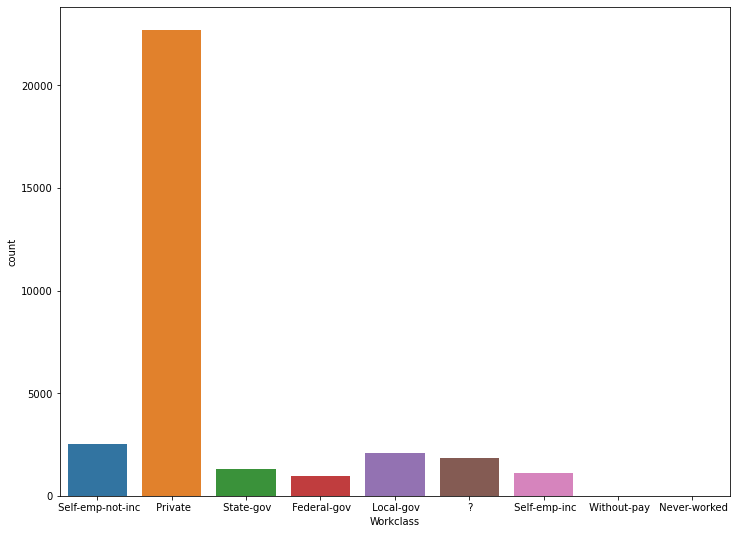

In [11]:
plt.figure(figsize=(12,9))
sns.countplot(cencus['Workclass'])

In [12]:
cencus['Fnlwgt'].value_counts()

123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [13]:
cencus['Fnlwgt'].nunique()

21647

In [14]:
cencus['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [15]:
cencus['Education'].nunique()

16

<AxesSubplot:xlabel='Education', ylabel='count'>

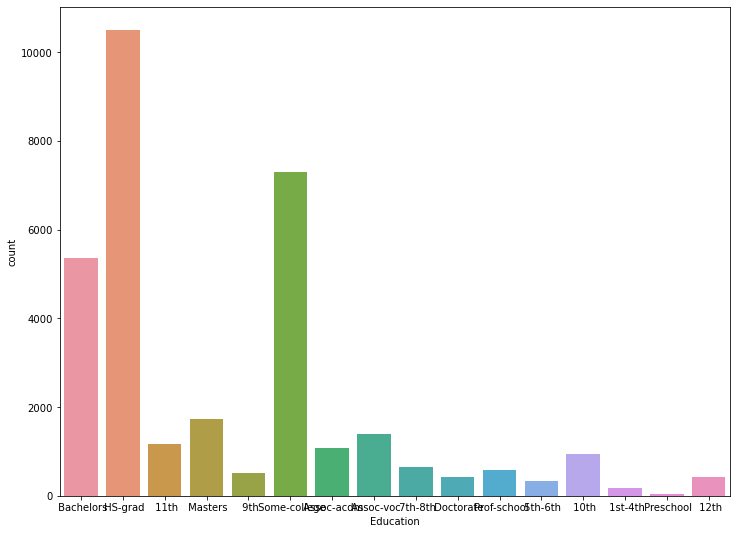

In [16]:
plt.figure(figsize=(12,9))
sns.countplot(cencus['Education'])

In [17]:
cencus['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [18]:
cencus['Education_num'].nunique()

16

<AxesSubplot:xlabel='Education_num', ylabel='count'>

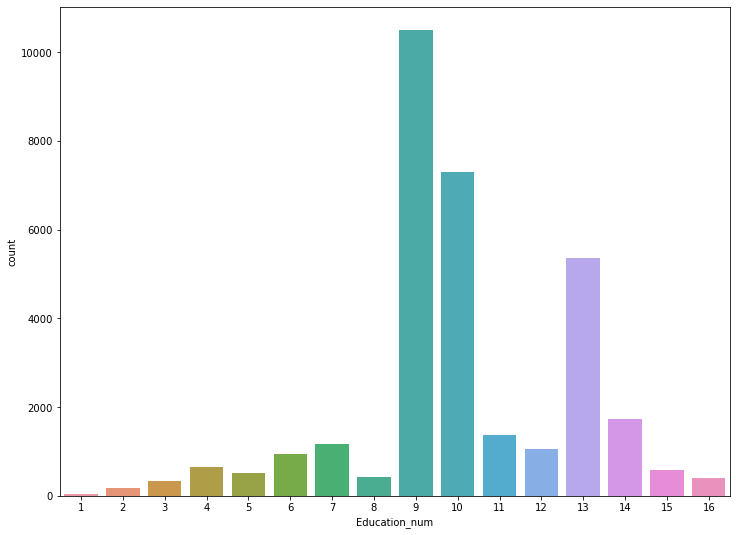

In [19]:
plt.figure(figsize=(12,9))
sns.countplot(cencus['Education_num'])

In [20]:
cencus['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [21]:
cencus['Marital_status'].nunique()

7

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

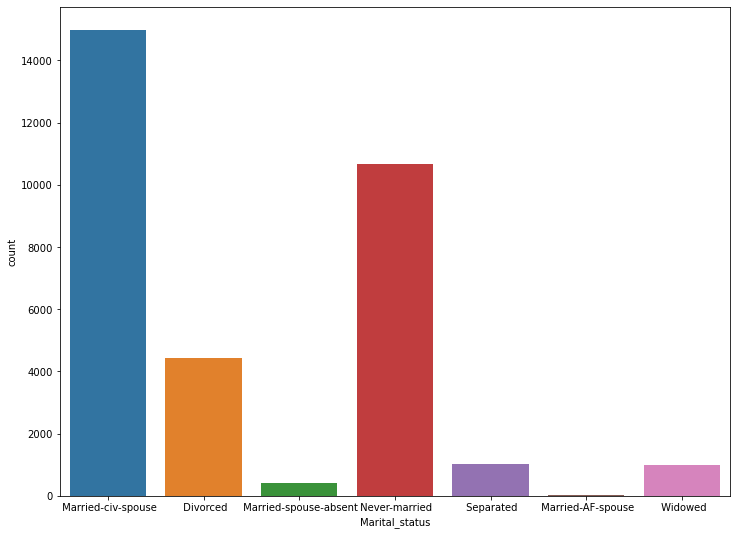

In [22]:
plt.figure(figsize=(12,9))
sns.countplot(cencus['Marital_status'])

In [23]:
cencus['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [24]:
cencus['Occupation'].nunique()

15

<AxesSubplot:xlabel='Occupation', ylabel='count'>

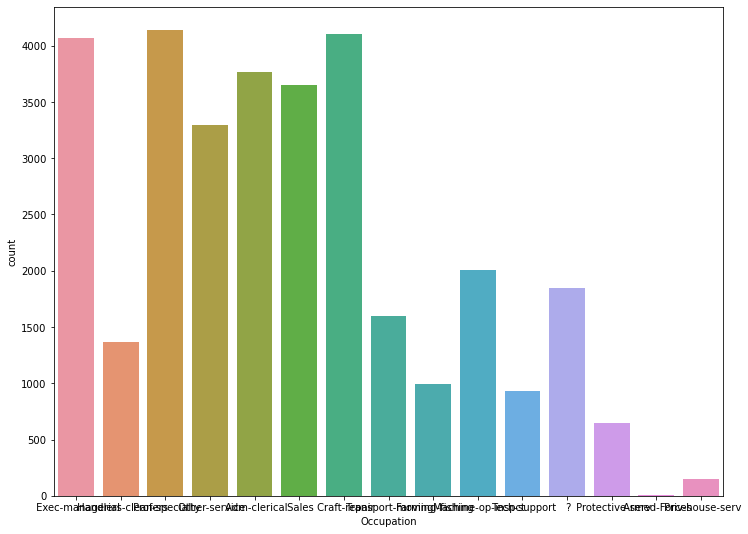

In [25]:
plt.figure(figsize=(12,9))
sns.countplot(cencus['Occupation'])

In [26]:
cencus['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [27]:
cencus['Relationship'].nunique()

6

<AxesSubplot:xlabel='Relationship', ylabel='count'>

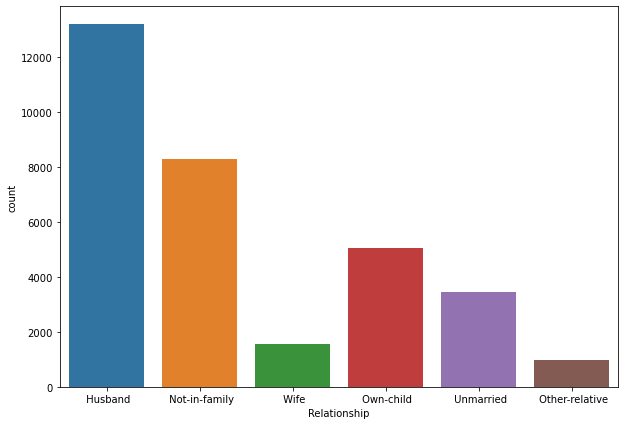

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(cencus['Relationship'])

In [29]:
cencus['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [30]:
cencus['Race'].nunique()

5

<AxesSubplot:xlabel='Race', ylabel='count'>

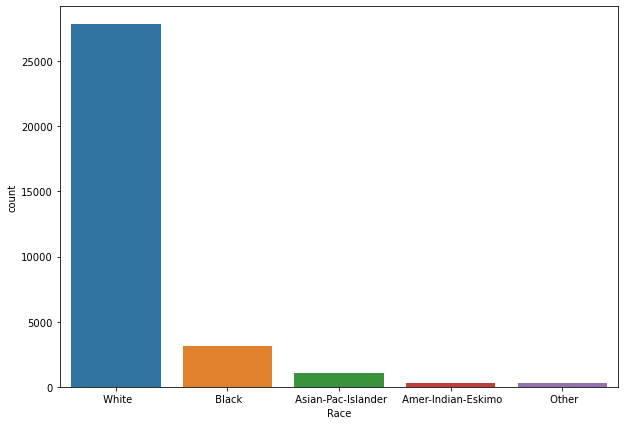

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(cencus['Race'])

In [32]:
cencus['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [33]:
cencus['Sex'].nunique()

2

<AxesSubplot:xlabel='Sex', ylabel='count'>

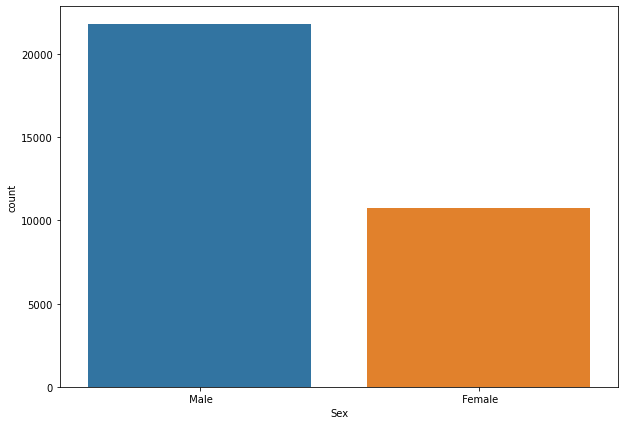

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(cencus['Sex'])

In [35]:
cencus['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [36]:
cencus['Capital_gain'].nunique()

119

In [37]:
cencus['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [38]:
cencus['Capital_loss'].nunique()

92

In [39]:
cencus['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64

In [40]:
cencus['Hours_per_week'].nunique()

94

In [41]:
cencus['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [42]:
cencus['Native_country'].nunique()

42

<AxesSubplot:xlabel='Native_country', ylabel='count'>

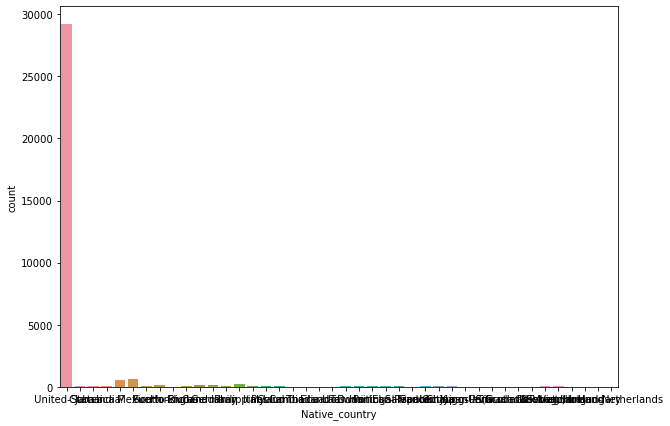

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(cencus['Native_country'])

In [44]:
cencus['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

### By observing target varaiable "Income" ,it consist of two class, So our Problem is Classification type

In [45]:
cencus['Income'].nunique()

2

<AxesSubplot:xlabel='Income', ylabel='count'>

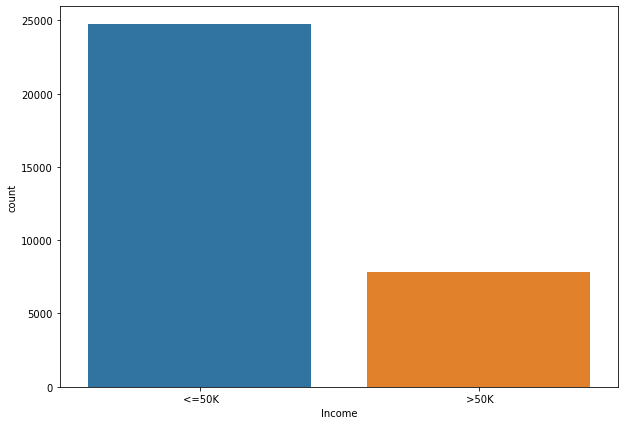

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(cencus['Income'])

total 24719 people has income greater than equal to 50K and 7841 people has income less than 50K, so much imbalance is peresent in the dataset,

In [47]:
cencus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Encoding

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cencus['Workclass']=le.fit_transform(cencus['Workclass'])
cencus['Education']=le.fit_transform(cencus['Education'])
cencus['Marital_status']=le.fit_transform(cencus['Marital_status'])
cencus['Occupation']=le.fit_transform(cencus['Occupation'])
cencus['Relationship']=le.fit_transform(cencus['Relationship'])                                     
cencus['Race']=le.fit_transform(cencus['Race']) 
cencus['Sex']=le.fit_transform(cencus['Sex'])
cencus['Native_country']=le.fit_transform(cencus['Native_country'])                               
cencus['Income']=le.fit_transform(cencus['Income'])                               

In encoding part,we prefered label encoding, it will assign 0 to n-1 numbers to a features if feature has n classes

In [49]:
cencus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


here we can see that all columns has datatype int32 now

# Bivariate Analysis

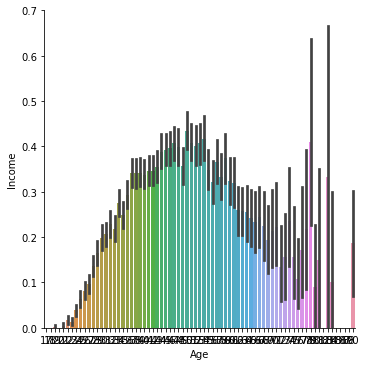

In [50]:
sns.catplot(x="Age", y="Income", kind="bar", data=cencus)

here we see that, age group more than 70 has highest income

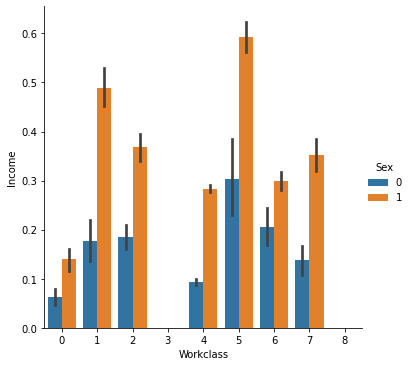

In [51]:
sns.catplot(x="Workclass", y="Income", hue="Sex", kind="bar", data=cencus)

by seeing above catplot we can see that,male of workclass 5 has highest income,then male of workclass 1 is second highest, workclass 3 has 0 income 

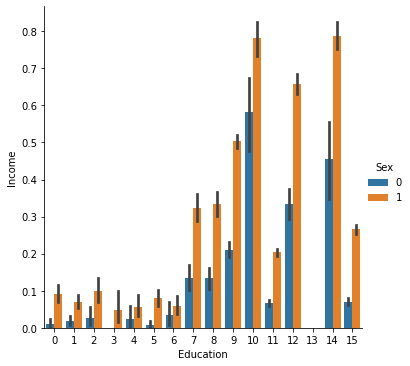

In [52]:
sns.catplot(x="Education", y="Income", hue="Sex", kind="bar", data=cencus)

Education of class 10 and class 14 has nearly same income, then second one is class 12, other education class has very low income

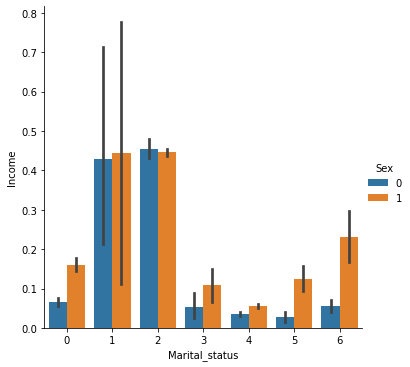

In [53]:
sns.catplot(x="Marital_status", y="Income", hue="Sex", kind="bar", data=cencus)

the feature "Marital_status" with class 1 and class 2 has highest income

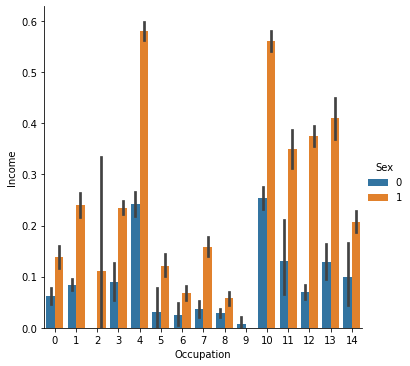

In [54]:
sns.catplot(x="Occupation", y="Income", hue="Sex", kind="bar", data=cencus)

feature "Occupation" with class 4 male and class 10 male has highest income

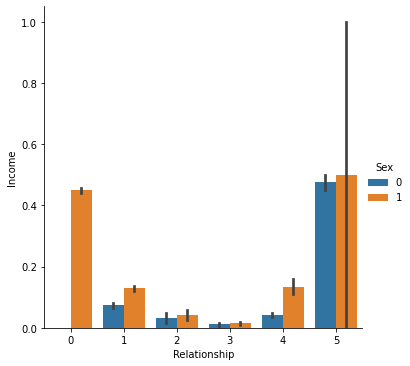

In [55]:
sns.catplot(x="Relationship", y="Income", hue="Sex", kind="bar", data=cencus)

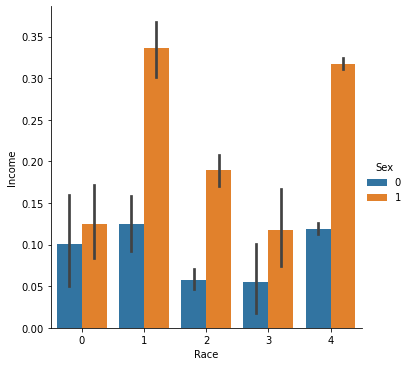

In [56]:
sns.catplot(x="Race", y="Income", hue="Sex", kind="bar", data=cencus)

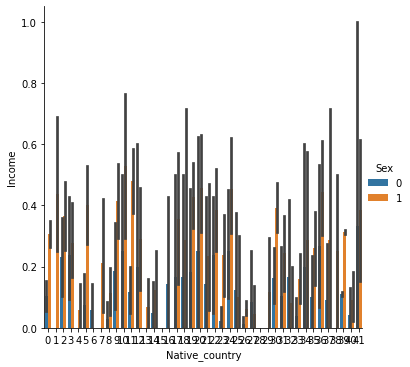

In [57]:
sns.catplot(x="Native_country", y="Income", hue="Sex", kind="bar", data=cencus)

<AxesSubplot:xlabel='Income', ylabel='count'>

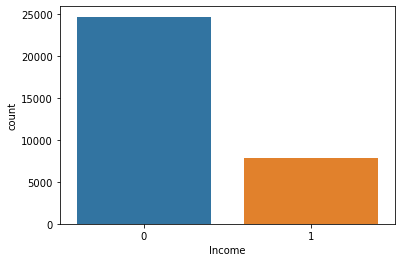

In [58]:
sns.countplot(cencus['Income'])

In [59]:
cencus['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [60]:
7841/24719


0.3172053885674987

the ratio for class 0 and 1 is  near 70:30 so it is class imbalance problem

In [61]:
cencus_num=cencus.drop(columns=['Workclass','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income'],axis=1)

here we made a separate dataframe for numerical columns only, by dropping categorical feature

In [62]:
cencus_cat=cencus.drop(columns=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week'])

here we made a separate dataframe for categorical columns only, by dropping continous feature

In [63]:
cencus_cat.shape

(32560, 10)

10 feature are categorical features

In [64]:
cencus_num

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


# Univariate Analysis for Continous features

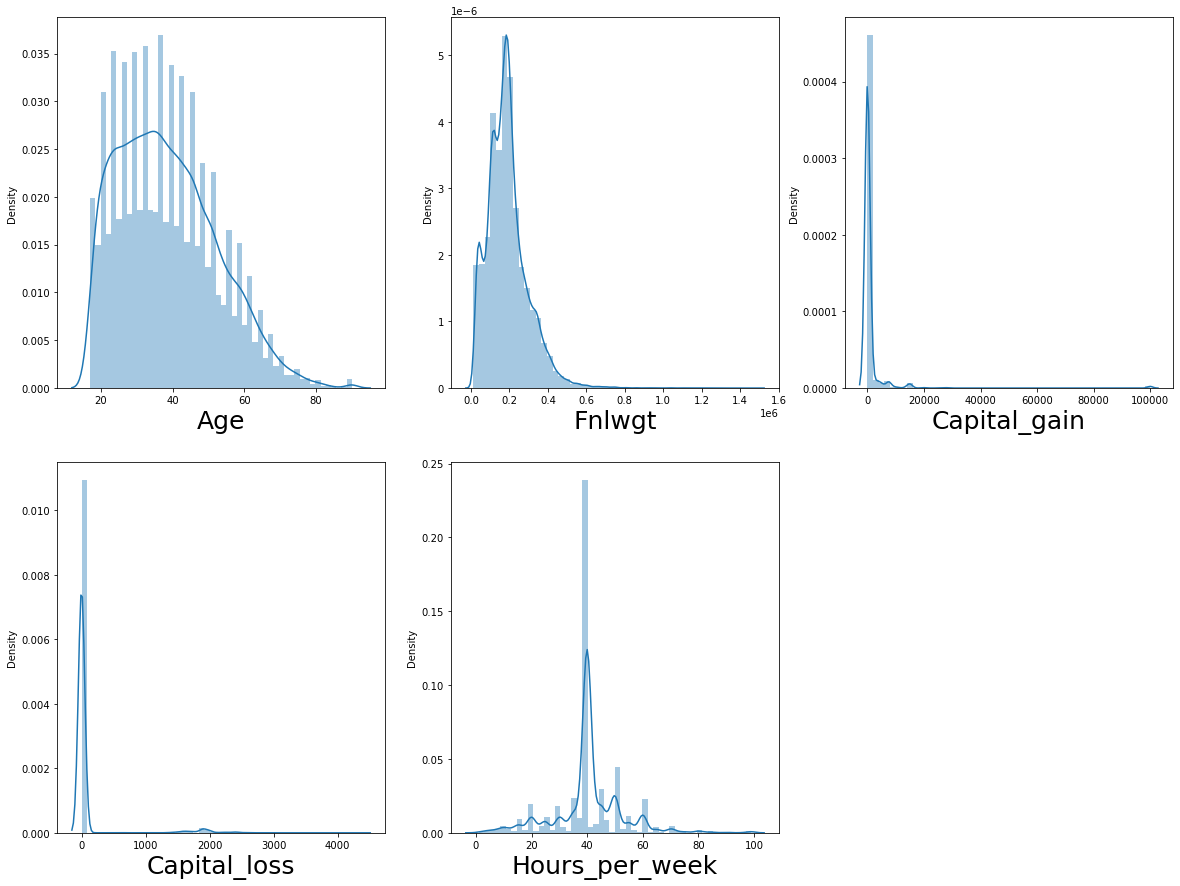

In [65]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in cencus_num:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(cencus_num[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

here we plot distplot for continous features,all features shows right skewness in the data, which can be treated by skewness removal technique

# Outlier Detection

<function matplotlib.pyplot.show(close=None, block=None)>

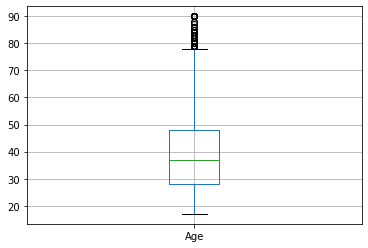

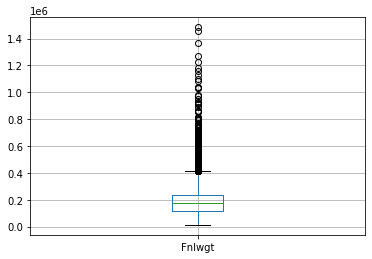

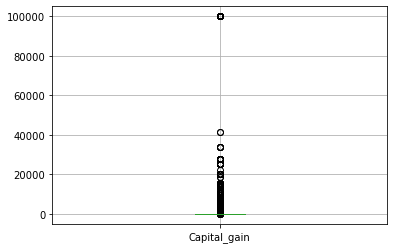

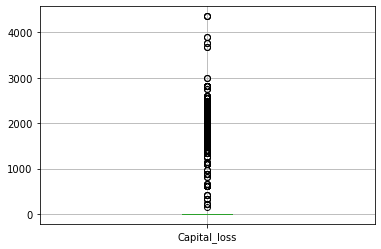

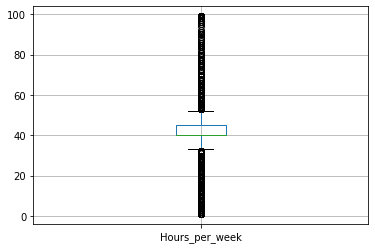

In [66]:
for column in cencus_num:  # we pass every column to for loop
    plt.figure()   
    cencus_num.boxplot([column]) # box plot of every column is plotted
plt.show

Every feature shows lot of outliers in the data, lets use zscore method to remove outliers

In [67]:
# lets use z score to remove outliers
from scipy.stats import zscore # z score represent the number of  standard deviation with which value of observation differ than mean value
z=np.abs(zscore(cencus_num))
cencus_num1=cencus_num[(z<3).all(axis=1)]  # z score with std deviation =3

In [68]:
cencus_num1.shape

(30028, 5)

In [69]:
30028/32560

0.9222358722358722

here we lost 7 to 8 percent data, we can not reduce data more than this

<function matplotlib.pyplot.show(close=None, block=None)>

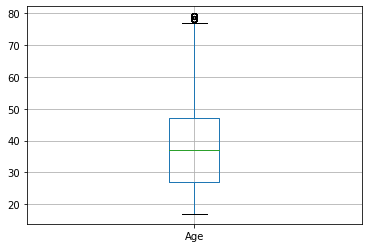

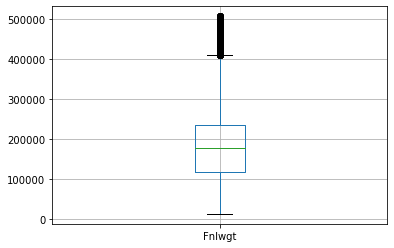

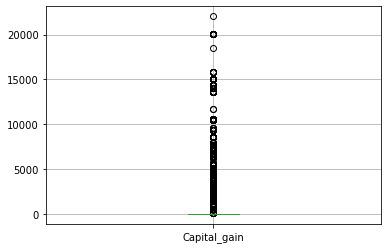

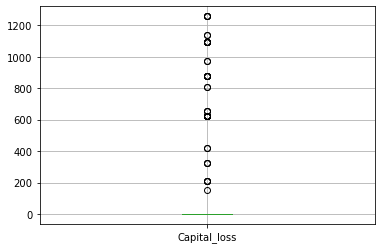

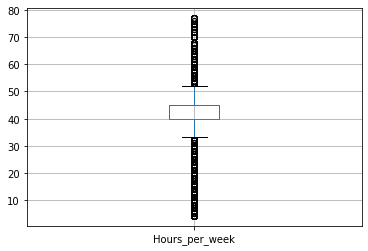

In [70]:
for column in cencus_num1:  # we pass every column to for loop
    plt.figure()   
    cencus_num1.boxplot([column]) # box plot of every column is plotted
plt.show

# Skewness removal 

here we used power transformer techniques to removes skewness from feature and try to make data normally distributed,

In [71]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
cencus_num1['Age']=scaler.fit_transform(cencus_num1['Age'].values.reshape(-1,1))
cencus_num1['Fnlwgt']=scaler.fit_transform(cencus_num1['Fnlwgt'].values.reshape(-1,1))
cencus_num1['Capital_gain']=scaler.fit_transform(cencus_num1['Capital_gain'].values.reshape(-1,1))
cencus_num1['Capital_loss']=scaler.fit_transform(cencus_num1['Capital_loss'].values.reshape(-1,1))
cencus_num1['Hours_per_week']=scaler.fit_transform(cencus_num1['Hours_per_week'].values.reshape(-1,1))

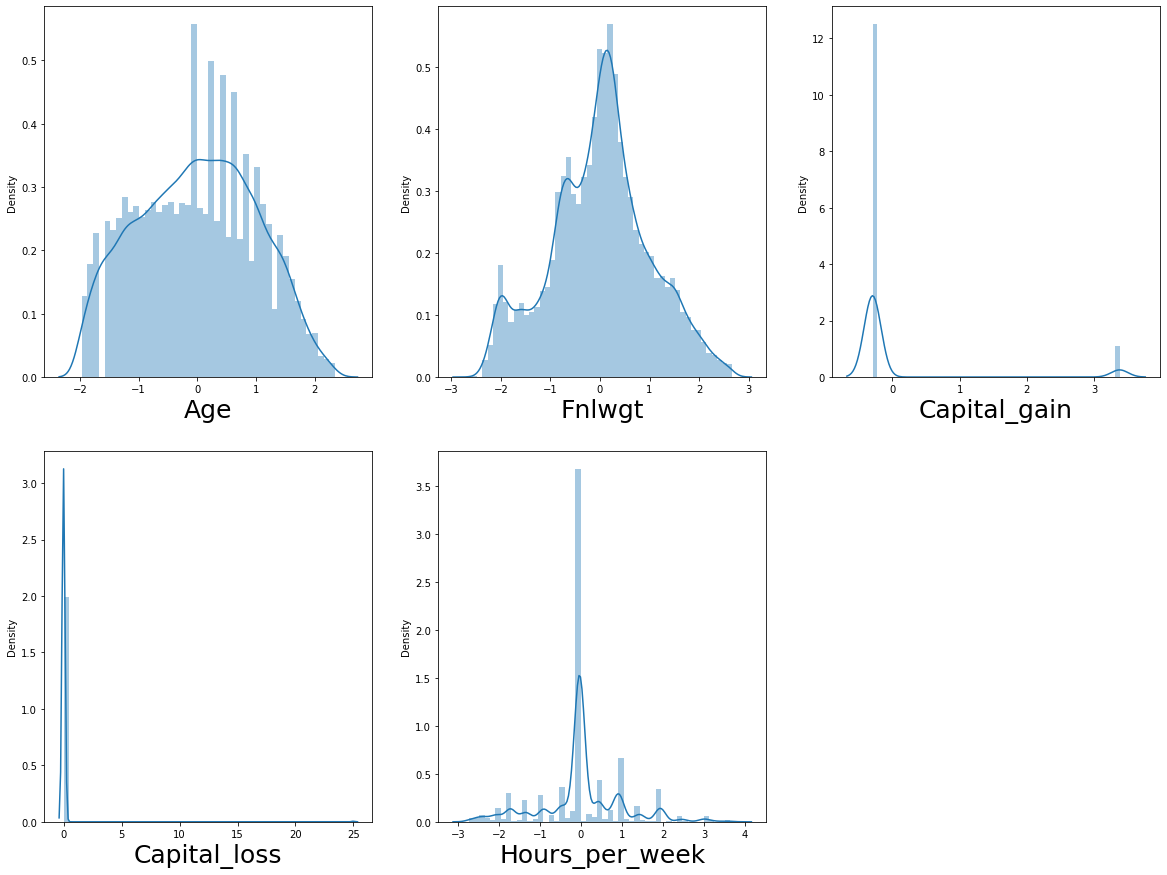

In [72]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in cencus_num1:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        sns.distplot(cencus_num1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

here we removed some skewness from data

# Multvariate Analysis

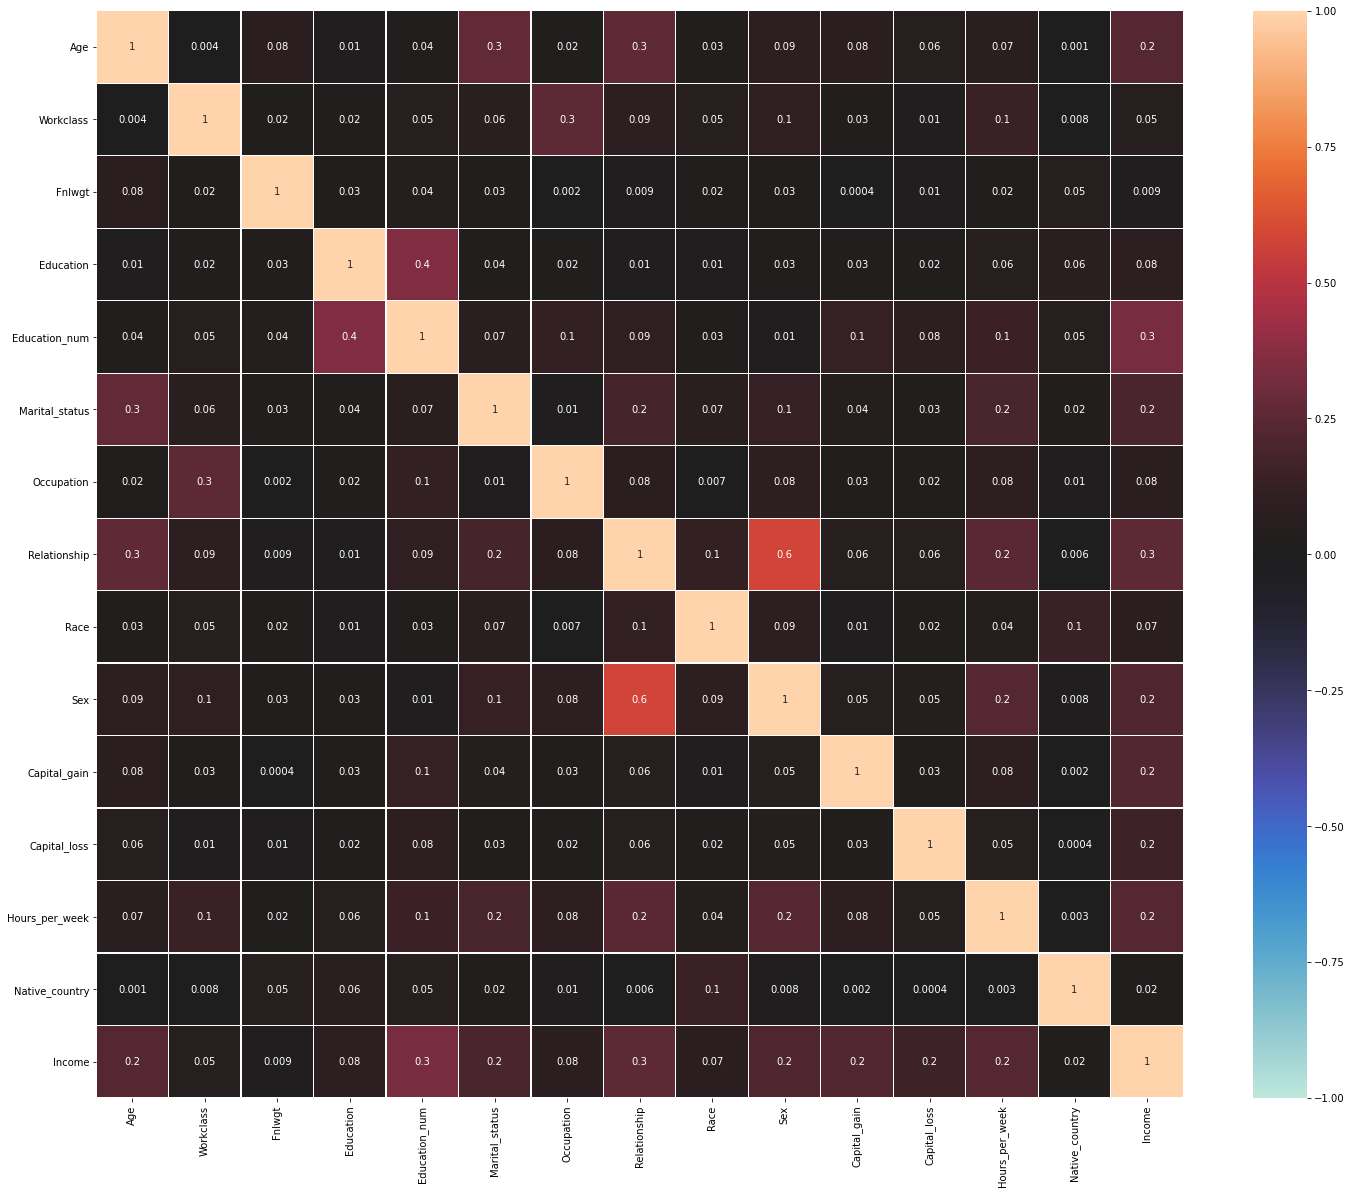

In [73]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
cencus_corr=cencus.corr().abs()
plt.figure(figsize=(25,20))
sns.heatmap(cencus_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

Heatmap is used to find correlation between independant variable and Target variable, value 1 indicate correlation of label verses label, we can not compare correlation between categorical and continous data.

In [74]:
corr_matrix=cencus.corr()   # here we get values of correlation in descending order
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

first value 1 shows relation between label verses label, so ignore it. the value of correation ranges between -1 to +1, 1 shows strong positive correlation between variable,it means if one variable increses other also increase,-1 represent strong negative correlation between variable,it means if one variable value increase other goes on decreasing, value 0 or near to 0 represents no correlation between variable

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(cencus_num1)

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

In [76]:
cencus_num2=pd.DataFrame(x_scaled,columns = cencus_num1.columns)# here converted array into dataframe
cencus_num2.head()

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.924752,-1.116219,-0.296001,-0.040013,-2.216033
1,0.126959,0.422177,-0.296001,-0.040013,-0.034840
2,1.099663,0.601968,-0.296001,-0.040013,-0.034840
3,-0.711387,1.480733,-0.296001,-0.040013,-0.034840
4,0.051693,1.042787,-0.296001,-0.040013,-0.034840


In [77]:
cencus_num2.shape

(30028, 5)

In [78]:
cencus_num2.isnull().sum()

Age               0
Fnlwgt            0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
dtype: int64

In [79]:
cencus_num2.reset_index(drop=True)

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.924752,-1.116219,-0.296001,-0.040013,-2.216033
1,0.126959,0.422177,-0.296001,-0.040013,-0.034840
2,1.099663,0.601968,-0.296001,-0.040013,-0.034840
3,-0.711387,1.480733,-0.296001,-0.040013,-0.034840
4,0.051693,1.042787,-0.296001,-0.040013,-0.034840
...,...,...,...,...,...
30023,-0.807818,0.806409,-0.296001,-0.040013,-0.217758
30024,0.272840,-0.211195,-0.296001,-0.040013,-0.034840
30025,1.374148,-0.238870,-0.296001,-0.040013,-0.034840
30026,-1.337480,0.284022,-0.296001,-0.040013,-1.720002


In [80]:
cencus_new = pd.concat([cencus_num2,cencus_cat],axis=1)  # here concate both dataframe after scaling

here we concatenate continous dataframe "cencus_num2" and "cencus_cat"  and made new dataframe "cencus_new"

In [81]:
cencus_new.shape

(32560, 15)

In [82]:
cencus_new.isna().sum()

Age               2532
Fnlwgt            2532
Capital_gain      2532
Capital_loss      2532
Hours_per_week    2532
Workclass            0
Education            0
Education_num        0
Marital_status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Native_country       0
Income               0
dtype: int64

In [83]:
cencus_new=cencus_new.dropna(axis=0)

null values rows are dropped

In [84]:
cencus_new.shape

(30028, 15)

# Oversampling using SMOTE

In [85]:
x_1=cencus_new.drop(columns=['Income'],axis=1)
y_1=cencus_new['Income']


SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

In [86]:
#lets use oversampling
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_1,y_1=SM.fit_resample(x_1,y_1)

In [87]:
y_1.value_counts()

1    22822
0    22822
Name: Income, dtype: int64

now we get same count for both label class

In [88]:
cencus_new = pd.concat([x_1,y_1],axis=1)  # here concate both dataframe after oversampling

In [89]:
cencus_new.shape

(45644, 15)

In [90]:
x=cencus_new.drop(columns=['Income'],axis=1)
y=cencus_new['Income']

In [91]:
cencus_new.shape

(45644, 15)

x has only feature and y contains only labels

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

classification score is used to check performance of classification model,classification score give accuracy which is ratio of true predictions divided by total predictions.classification report contains precision,f1 score and accuracy.
Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [93]:
 #finding best random state
from sklearn.tree import DecisionTreeClassifier
maxAccu=0  # initially max accuracy is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    acc=accuracy_score(y_test,pred) # genrate accuracy score by comparing test label and predicted label
    if acc> maxAccu:
        maxAccu=acc # assign accuracy score to max accuracy
        MaxRs=i  # the number at which we get maxaccuracy is treated as random state
print('Best Accuracy is',maxAccu,"on Random state",MaxRs)

Best Accuracy is 0.8123740250635352 on Random state 178


Whatever number we get as a random state is used by train test split in below code

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [96]:
Log_reg=LogisticRegression()
Log_reg.fit(x_train,y_train)
Log_reg_pred=Log_reg.predict(x_test)
Log_reg_accuracy=accuracy_score(y_test,Log_reg_pred)
print('Log_reg_accuracy',Log_reg_accuracy*100)

Log_reg_accuracy 72.9208658312155


Logistics Regression is a algorithm used to predict data value by analysing one or more the independant features or variables

In [97]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)# fit training data to classifier
DTC_pred=DTC.predict(x_test)# predict output according test data
DTC_accuracy=accuracy_score(y_test,DTC_pred) #here we compared y_test with predicted output
print('DTC_accuracy',DTC_accuracy*100)

DTC_accuracy 81.04460608185084


Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [98]:
KNC=KNeighborsClassifier()
KNC.fit(x_train,y_train)# fit training data to classifier
KNC_pred=KNC.predict(x_test)# predict output according test data
KNC_accuracy=accuracy_score(y_test,KNC_pred) #here we compared y_test with predicted output
print('KNC_accuracy',KNC_accuracy*100)

KNC_accuracy 83.08649548681097


KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [99]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
svc_pred=svc.predict(x_test) #predict output according test data
svc_accuracy=accuracy_score(y_test,svc_pred) #here we compared y_test with predicted output
print('svc_accuracy',svc_accuracy*100)

svc_accuracy 73.4379107878363


SVC is effective when number of dimensions are greater than number of samples,it uses subset of training points(support vector) and hyperplane to give classification output

In [100]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
RFC_pred=RFC.predict(x_test) #predict label according test feature
RFC_accuracy=accuracy_score(y_test,RFC_pred)#here we compared test label with predicted label
print('RFC_accuracy',RFC_accuracy*100)

RFC_accuracy 86.55683112785908


RFC is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [101]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)# fit training data to classifier
GBC_pred=GBC.predict(x_test) #predict label according test feature
GBC_accuracy=accuracy_score(y_test,GBC_pred)#here we compared test label with predicted label
print('GBC_accuracy',GBC_accuracy*100)

GBC_accuracy 82.6921391639646


Gradient boosting is ensemble algorithm it involves building a strong model by using collection of weaker models.It combine many weak models and make strong predictive model

In [102]:
XBC=XGBClassifier(eval_metric='mlogloss')
XBC.fit(x_train,y_train)# fit training data to classifier
XBC_pred=XBC.predict(x_test) #predict label according test feature
XBC_accuracy=accuracy_score(y_test,XBC_pred)#here we compared test label with predicted label
print('XBC_accuracy',XBC_accuracy*100)

XBC_accuracy 87.8538252563316


In [103]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [104]:
Log_reg_cv_score=cross_val_score(Log_reg,x,y,cv=5).mean() # we pass Logistic regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Log_reg_cv_score*100

72.46517416302642

In [105]:
DTC_CV_score=cross_val_score(DTC,x,y,cv=5).mean() # we pass Decision Tree classifier model,feature,target and cv=5 means 4 set for training and 1 for testing
DTC_CV_score*100

80.18364634128663

In [106]:
KNC_CV_score=cross_val_score(KNC,x,y,cv=5).mean() # we pass model K neighbors Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
KNC_CV_score*100

83.23549356679301

In [107]:
svc_CV_score=cross_val_score(svc,x,y,cv=5).mean() # we pass model Support Vector Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
svc_CV_score*100

73.33056408634674

In [108]:
RFC_CV_score=cross_val_score(RFC,x,y,cv=5).mean() # we pass model Random Forest Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
RFC_CV_score*100

86.77595735830062

In [109]:
GBC_CV_score=cross_val_score(GBC,x,y,cv=5).mean() # we pass model Gradient boosting Classifier,feature,target and cv=5 means 4 set for training and 1 for testing
GBC_CV_score*100

81.8618236957874

In [110]:
XBC_CV_score=cross_val_score(XBC,x,y,cv=5).mean() # we pass model Extreme Gradient boosting,feature,target and cv=5 means 4 set for training and 1 for testing
XBC_CV_score*100

85.79454107447552

In [111]:
Logistic_regression_diff=Log_reg_accuracy*100-Log_reg_cv_score*100
print('Logistic_regression_diff',Logistic_regression_diff)
DTC_diff=DTC_accuracy*100-DTC_CV_score*100
print('DTC_diff',DTC_diff)
KNC_diff=KNC_accuracy*100-KNC_CV_score*100
print("KNC_diff",KNC_diff)
svc_diff=svc_accuracy*100-svc_CV_score*100
print("svc_diff",svc_diff)
RFC_diff=RFC_accuracy*100-RFC_CV_score*100
print("RFC_diff",RFC_diff)
GBC_diff=GBC_accuracy*100-GBC_CV_score*100
print("GBC_diff",GBC_diff)
XBC_diff=XBC_accuracy*100-XBC_CV_score*100
print("XBC_diff",XBC_diff)

Logistic_regression_diff 0.45569166818907547
DTC_diff 0.860959740564212
KNC_diff -0.14899807998203585
svc_diff 0.10734670148956127
RFC_diff -0.2191262304415318
GBC_diff 0.8303154681772043
XBC_diff 2.0592841818560856


In above line, we take difference of accuracy score of each model with cross vaidation score of that model, we multiply the differnce by 100 to get percentage values

In [112]:
print("Log_reg_accuracy",Log_reg_accuracy)
print("Log_reg_cv_score", Log_reg_cv_score)
print("Logistic_regression_diff", Logistic_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("DTC_accuracy",DTC_accuracy)
print("DTC_CV_score",DTC_CV_score)
print("DTC_diff",DTC_diff)
print("-------------------------------------------------------------------------------------------")
print("KNC_accuracy",KNC_accuracy)
print("KNC_CV_score", KNC_CV_score)
print("KNC_diff",KNC_diff)

print("-------------------------------------------------------------------------------------------")
print("svc_accuracy",svc_accuracy)
print("svc_CV_score",svc_CV_score)
print("svc_diff", svc_diff)
print("-------------------------------------------------------------------------------------------")

print("RFC_accuracy",RFC_accuracy)
print("RFC_CV_score",RFC_CV_score)
print("RFC_diff",RFC_diff)

print("-------------------------------------------------------------------------------------------")

print("GBC_accuracy",GBC_accuracy)
print("GBC_CV_score",GBC_CV_score) 
print("GBC_diff",GBC_diff)

print("-------------------------------------------------------------------------------------------")

print("XBC_accuracy",XBC_accuracy)
print("XBC_CV_score",XBC_CV_score) 
print("XBC_diff",XBC_diff)

Log_reg_accuracy 0.729208658312155
Log_reg_cv_score 0.7246517416302642
Logistic_regression_diff 0.45569166818907547
-------------------------------------------------------------------------------------------
DTC_accuracy 0.8104460608185085
DTC_CV_score 0.8018364634128663
DTC_diff 0.860959740564212
-------------------------------------------------------------------------------------------
KNC_accuracy 0.8308649548681097
KNC_CV_score 0.8323549356679301
KNC_diff -0.14899807998203585
-------------------------------------------------------------------------------------------
svc_accuracy 0.734379107878363
svc_CV_score 0.7333056408634674
svc_diff 0.10734670148956127
-------------------------------------------------------------------------------------------
RFC_accuracy 0.8655683112785908
RFC_CV_score 0.8677595735830061
RFC_diff -0.2191262304415318
-------------------------------------------------------------------------------------------
GBC_accuracy 0.826921391639646
GBC_CV_score 0.81861823

here we get accuracy score for each model as well as CV score for all model, and difference of all model, we get high accuracy for RFC and XBC, their CV score is also high, diff is less for RFC,for XBC Accuracy is highest but cv score is less than RFC, but difference is more than RFC so we will do hyperparameter tuning for both RFC and XBC also

In [113]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [114]:
# first we will do hyperparameter tuning for RFC

In [115]:
params1={'n_estimators':[10,15],
       'criterion':['entropy'],
       'max_depth':[10,15],
       'min_samples_leaf':[5,6],
       'min_samples_split':[10,11]}

In [116]:
Grid_RFC=GridSearchCV(RFC,param_grid=params1,cv=5)
Grid_RFC.fit(x_train,y_train)
Grid_RFC.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 15}

In [125]:
Final_RFC=RandomForestClassifier(criterion='entropy',max_depth=15,min_samples_leaf=5 ,min_samples_split=11,n_estimators=15)
Final_RFC.fit(x_train,y_train)
final_pred_RFC=Final_RFC.predict(x_test)
final_score1=accuracy_score(y_test,final_pred_RFC)
print(final_score1*100)

83.20042064674436


In [118]:
# now we will do hyperparameter tuning for XBC

In [119]:
params2={
       'booster':['gbtree'],
       'max_depth':[4,5,6],
       'gamma':[0,1,2,3],
       'min_child_weight':[1,2,3,4],
     'learning_rate':[0.1,0.3,0.5,0.8]}

In [120]:
Grid_XBC=GridSearchCV(XGBClassifier(eval_metric='mlogloss'),param_grid=params2,cv=5)
Grid_XBC.fit(x_train,y_train)
Grid_XBC.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 2}

In [126]:
Final_XBC=XGBClassifier(eval_metric='mlogloss',gamma=0,learning_rate=0.3 ,max_depth=6,min_child_weight=2,booster='gbtree')
Final_XBC.fit(x_train,y_train)
final_pred_XBC=Final_XBC.predict(x_test)
final_score2=accuracy_score(y_test,final_pred_XBC)
print(final_score2*100)

88.01156778547016


# We get Accuracy score higher than Random Forest classifier so we will save extreme gradient boosting classifier(XBC) as a final model

In [122]:
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(y_test,final_pred_XBC)
cfm

array([[5076,  670],
       [ 725, 4940]], dtype=int64)

Confusion matrix give us matrix of TN,TP,FP and FN

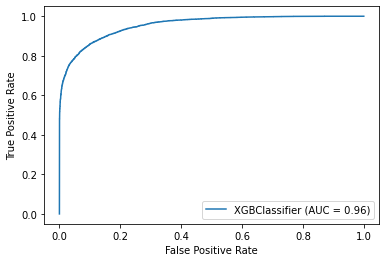

In [123]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(Final_XBC,x_test,y_test)

This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our Extreme Boosting classifier ROC curve cover almost more than 95 % area under it.



In [124]:
import joblib
joblib.dump(Final_XBC,"Census Income Project.pkl")

['Census Income Project.pkl']